## Problem: Count unreachable pairs of nodes in an undirected grap
LeetCode: 2316

https://leetcode.com/problems/count-unreachable-pairs-of-nodes-in-an-undirected-graph/description/

You are given an integer n. There is an undirected graph with n nodes, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

Return the number of pairs of different nodes that are unreachable from each other.

 

Example 1:


    Input: n = 3, edges = [[0,1],[0,2],[1,2]]
    Output: 0
    Explanation: There are no pairs of nodes that are unreachable from each other. Therefore, we return 0.
Example 2:

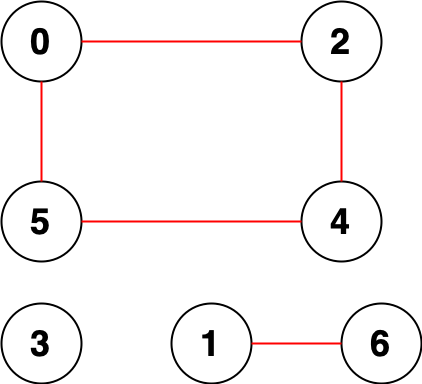!

    Input: n = 7, edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]
    Output: 14
    Explanation: There are 14 pairs of nodes that are unreachable from each other:
    [[0,1],[0,3],[0,6],[1,2],[1,3],[1,4],[1,5],[2,3],[2,6],[3,4],[3,5],[3,6],[4,6],[5,6]].
    Therefore, we return 14.
 

Constraints:

    1 <= n <= 10^5
    0 <= edges.length <= 2 * 10^5
    edges[i].length == 2
    0 <= ai, bi < n
    ai != bi
    There are no repeated edges.

In [35]:

## This is faster compare to below solution. Time taken = 1559 ms
def countPairs1(n, edges):
        uf = UnionFind(n)
        count = n
        for e in edges:
            count -= uf.union(e[0], e[1])
        if count == 0:
            return 0
        ans = 0
        remaining = n
        for i in range(n):
            if uf.root[i] == i:
                remaining = remaining - uf.rank[i]
                ans += uf.rank[i] * remaining
            if remaining == 0:
                break
        return ans
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1]*size
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx != rooty:
            if self.rank[rootx] > self.rank[rooty]:
                self.root[rooty] = rootx
                self.rank[rootx] += self.rank[rooty]
            else:
                self.root[rootx] = rooty
                self.rank[rooty] += self.rank[rootx]
            return 1
        return 0


In [36]:
n = 7
edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]
countPairs1(n, edges)

14

In [37]:
n = 11
edges = [[5,0],[1,0],[10,7],[9,8],[7,2],[1,3],[0,2],[8,5],[4,6],[4,2]]
countPairs1(n, edges)

0

In [28]:
## This is slower compare to above solution. It took 1643 ms.
def countPairs(n, edges):
        uf = UnionFind(n)
        for e in edges:
            uf.union(e[0], e[1])
        freq = {}
        for i in range(n):
            rooti = uf.find(i)
            freq[rooti] = freq.get(rooti, 0) + 1
        ans = 0
        remaiingNodes = n
        for v in freq.values():
            ans += v*(remaiingNodes - v)
            remaiingNodes -= v

        return ans

class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1]*size
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx != rooty:
            if self.rank[rootx] > self.rank[rooty]:
                self.root[rooty] = rootx
            elif self.rank[rootx] < self.rank[rooty]:
                self.root[rootx] = rooty
            else:
                self.root[rooty] = rootx
                self.rank[rootx] += 1
    def getRoot(self):
        return self.root
        

In [29]:
n = 7
edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]
countPairs(n, edges)

14

In [30]:
n = 5
edges = [[1,0],[3,1],[0,4],[2,1]]
countPairs(n, edges)

0

In [31]:
n = 11
edges = [[5,0],[1,0],[10,7],[9,8],[7,2],[1,3],[0,2],[8,5],[4,6],[4,2]]
countPairs(n, edges)

0